### <div class="alert alert-block alert-info"> [Part1] openCV를 이용한 비디오 처리


In [4]:
#######################################
### 비디오를 시작함. (틱톡비디오 )
######################################
import cv2
from glob import glob

fileList=glob('./data/*.mp4')
vedio_file=fileList[0]
cap = cv2.VideoCapture(vedio_file) # 동영상 캡쳐 객체 생성  ---①
fps=cap.get(cv2.CAP_PROP_FPS)
delay=int(1000/fps)

cnt=0
while cap.isOpened():       #비디어으=

    ret, frame = cap.read()      # ret는 프레임이 있는지 확인, img는 각 프레임별 이미지
    cnt+=1
    if ret:                     # 프레임 읽기 정상
        cv2.imshow('title', frame) # 화면에 표시  --- ③
    
        
    if cv2.waitKey(delay) & 0xFF == ord('q') :
        cap.release()                       # 캡쳐 자원 반납
        cv2.destroyAllWindows()
        break

print('total img: {0}'.format(cnt))

total img: 109


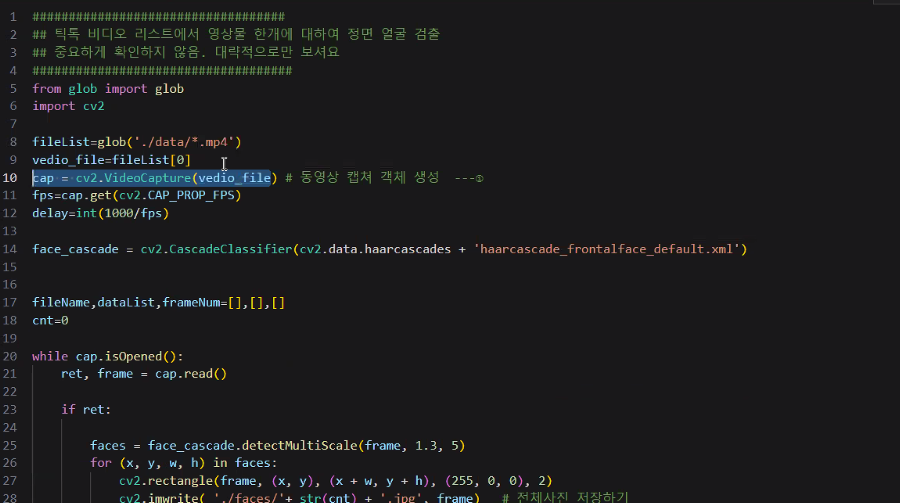

### <div class="alert alert-block alert-info"> [Part2] 사진에서 정면 얼굴검출
- 다양한 하르검출기
    - https://github.com/kipr/opencv/tree/master/data/haarcascades
- 


In [1]:
#######################
### 사진에서 얼굴검출
### 아래 사이트에서 읽어서 확인해보세요
### -https://minimin2.tistory.com/139
#######################

import cv2

# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 이미지 불러오기
img = cv2.imread('sample.jpg')
img= cv2.resize(img, dsize=(1200,600), interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # 눈 찾기
    roi_color = img[y:y + h, x:x + w]
    roi_gray = gray[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# 영상 출력
cv2.imshow('image', img)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

### <div class="alert alert-block alert-info"> [Part3] TikTok Trending Videos
- https://www.kaggle.com/code/stpeteishii/faces-extract-from-tiktok
- kaggle에서도 비디오에서 얼굴만 검출하여서 별도의 폴더에 저장하고 별도의 작업 없음.

In [2]:
###################################
## 틱톡 비디오 리스트에서 영상물 한개에 대하여 정면 얼굴 검출
## 중요하게 확인하지 않음. 대략적으로만 보셔요
####################################
from glob import glob
import cv2

fileList=glob('./data/*.mp4')
vedio_file=fileList[0]
cap = cv2.VideoCapture(vedio_file) # 동영상 캡쳐 객체 생성  ---①
fps=cap.get(cv2.CAP_PROP_FPS)
delay=int(1000/fps)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


fileName,dataList,frameNum=[],[],[]
cnt=0

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        
        faces = face_cascade.detectMultiScale(frame, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.imwrite( './faces/'+ str(cnt) + '.jpg', frame)   # 전체사진 저장하기
            
            
            roi=frame[y:y+h,x:x+w]
            cv2.imwrite( './faces_cut/'+ str(cnt) + '.jpg', roi) # 얼굴영역만 저장하기
            print(str(cnt) + 'save')
            
            fileName.append(vedio_file)
            dataList.append([x,y,w,h])
            frameNum.append(cnt)
            
        cv2.imshow('title', frame) # 화면에 표시  --- ③
        
        
        
        cv2.waitKey(delay)
        
        cnt+=1
    else:
        break
        
cap.release()
cv2.destroyAllWindows()      


75save
76save
77save
78save
109save
114save
123save
139save


In [3]:
import pandas as pd
df=pd.DataFrame({'fileName':fileName,
                 'frameNum':frameNum, 
              'dataList':dataList})

df


,fileName,frameNum,dataList
0,./data\6875317312082201857.mp4,75,"[337, 185, 47, 47]"
1,./data\6875317312082201857.mp4,76,"[333, 184, 46, 46]"
2,./data\6875317312082201857.mp4,77,"[327, 181, 46, 46]"
3,./data\6875317312082201857.mp4,78,"[320, 178, 47, 47]"
4,./data\6875317312082201857.mp4,109,"[308, 293, 89, 89]"
5,./data\6875317312082201857.mp4,114,"[398, 460, 56, 56]"
6,./data\6875317312082201857.mp4,123,"[413, 294, 28, 28]"
7,./data\6875317312082201857.mp4,139,"[419, 298, 26, 26]"


In [4]:
################################
## data 폴더내의 영상정보 모두 사용
## 여러 동영상에서 정면 얼굴 정보 검출
###############################
from glob import glob
import cv2

fileList=glob('./data/*.mp4')





face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
fileName,dataList,frameNum=[],[],[]

for vedio_file in fileList:
    cap = cv2.VideoCapture(vedio_file) # 동영상 캡쳐 객체 생성  ---①
    fps=cap.get(cv2.CAP_PROP_FPS)
    delay=int(1000/fps)
    
    cnt=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret:
            
            faces = face_cascade.detectMultiScale(frame, 1.3, 5)
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                fileName.append(vedio_file)
                dataList.append([x,y,w,h])
                frameNum.append(cnt)
                
            cv2.imshow('title', frame) # 화면에 표시  --- ③
            cv2.waitKey(delay)
            cnt+=1
        else:
            break
            
    cap.release()
    cv2.destroyAllWindows()      
    print(vedio_file + '- end - ')
   

./data\6875317312082201857.mp4- end - 
./data\6875342937002085633.mp4- end - 
./data\6875436892226178305.mp4- end - 
./data\6875453919879908614.mp4- end - 
./data\6875528457388903681.mp4- end - 


In [18]:
import pandas as pd
df=pd.DataFrame({'fileName':fileName,
                 'frameNum':frameNum, 
              'dataList':dataList})

df.head()


,fileName,frameNum,dataList
0,./data\6875317312082201857.mp4,75,"[337, 185, 47, 47]"
1,./data\6875317312082201857.mp4,76,"[333, 184, 46, 46]"
2,./data\6875317312082201857.mp4,77,"[327, 181, 46, 46]"
3,./data\6875317312082201857.mp4,78,"[320, 178, 47, 47]"
4,./data\6875317312082201857.mp4,109,"[308, 293, 89, 89]"


In [48]:
df['fileName'].value_counts()  # 정면얼굴 가장 많이 나온 비디오, 단 비디오 길이에 따라 횟수의 의미가 있음으로 비디오 프레임에 따른 평균을 구해야함

fileName
./data\6875317312082201857.mp4    8
Name: count, dtype: int64

### <div class="alert alert-block alert-info"> [Part4] TikTok Trending Videos

## [얼굴자르기 전처리 실습]
- https://seokii.tistory.com/112


## [얼굴방향 좌표값 인식 하기 실습]
-https://suy379.tistory.com/92 